In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [2]:
X, y = shap.datasets.nhanesi()
features = X.columns.tolist()
data = X.assign(target = y)
data.head()

,sex_isFemale,age,physical_activity,serum_albumin,alkaline_phosphatase,alkaline_phosphatase_isUnacceptable,alkaline_phosphatase_isTestnotdone,SGOT,SGOT_isUnacceptable,SGOT_isTestnotdone,...,urine_hematest_isBlankbutapplicable,sedimentation_rate,sedimentation_rate_isBlankbutapplicable,uric_acid,uric_acid_isUnacceptable,uric_acid_isTestnotdone,systolic_blood_pressure,pulse_pressure,bmi,target
20751,False,51,3,NaN,85.0,False,False,NaN,True,False,...,False,NaN,False,6.2,False,False,110.0,40.0,25.406803,-16.916667
20753,False,41,2,NaN,68.0,False,False,2.27,False,False,...,False,NaN,False,7.7,False,False,136.0,54.0,24.588331,-17.166667
20754,True,31,2,NaN,61.0,False,False,1.86,False,False,...,False,NaN,False,4.9,False,False,110.0,24.0,23.756502,-17.666667
20755,False,48,2,NaN,58.0,False,False,NaN,True,False,...,False,NaN,False,8.4,False,False,126.0,36.0,28.610011,-17.250000
20756,True,29,3,NaN,37.0,False,False,1.69,False,False,...,False,NaN,False,4.3,False,False,98.0,36.0,19.216489,-17.083333


In [3]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

reg = CatBoostRegressor(verbose=False)
train, test = train_test_split(data, test_size=.25)

In [4]:
reg.fit(train[features], train['target'])

In [5]:
exp = shap.Explainer(reg)
shap_values = exp(test[features])

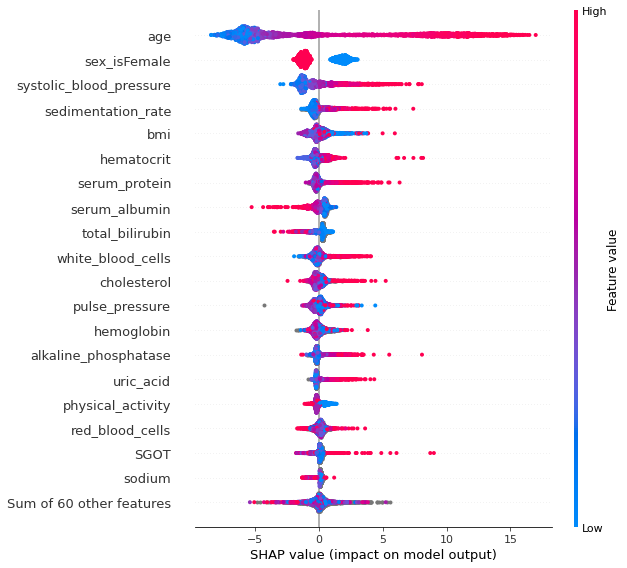

In [6]:
shap.plots.beeswarm(shap_values, max_display=20)

In [20]:
shap_test_df = pd.DataFrame(shap_values.values, columns=features)
most_important_on_avg = shap_test_df.abs().mean().sort_values().tail(40).index.tolist()

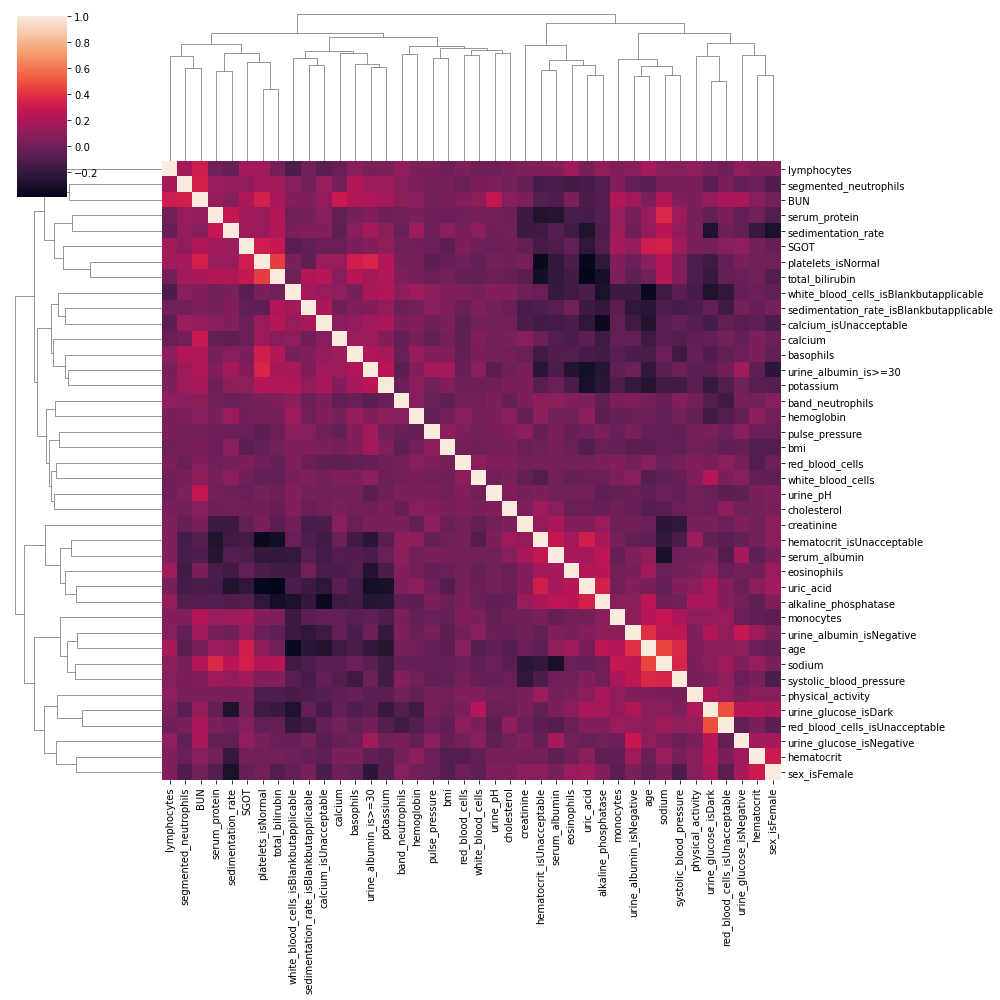

In [22]:
sns.clustermap( shap_test_df[most_important_on_avg].corr(method='spearman'), figsize=(14, 14))

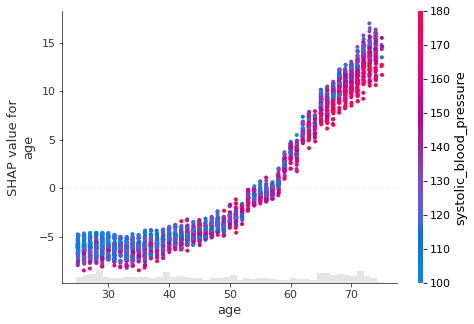

In [29]:
shap.plots.scatter(shap_values[:,"age"], color=shap_values)

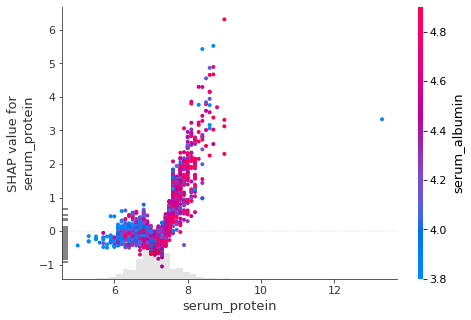

In [37]:
shap.plots.scatter(shap_values[:,"serum_protein"], color=shap_values)